# Kaggle 上的信用卡欺诈数据集（https://www.kaggle.com/mlg-ulb/creditcardfraud）是一个非均衡数据集，请针对该数据集进行非均衡数据的处理（重采样、欠采样等），并使用数据集切分和交叉验证，分别训练和测试AdaBoost 以及XGBoost模型的性能（需要包含precision，recall，F1-score），绘制ROC 曲线计算AUC 值。

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17055
           1       0.99      0.96      0.97      8533

    accuracy                           0.98     25588
   macro avg       0.98      0.98      0.98     25588
weighted avg       0.98      0.98      0.98     25588

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17055
           1       1.00      1.00      1.00      8533

    accuracy                           1.00     25588
   macro avg       1.00      1.00      1.00     25588
weighted avg       1.00      1.00      1.00     25588



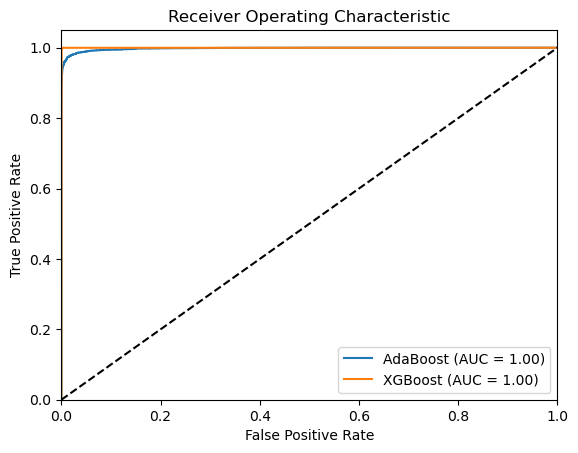

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Split the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Handle the imbalance using SMOTE and RandomUnderSampler
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train and evaluate AdaBoost model
ada = AdaBoostClassifier(n_estimators=100, random_state=42,algorithm='SAMME')
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))

# Train and evaluate XGBoost model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Plot ROC curves and calculate AUC for both models
def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.figure()
plot_roc_curve(y_test, ada.predict_proba(X_test)[:, 1], 'AdaBoost')
plot_roc_curve(y_test, xgb.predict_proba(X_test)[:, 1], 'XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()